# Домашнее задание 8

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 21 апреля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_8

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим билинейную седловую задачу:
\begin{equation}
\min_{x \in [-10; 10]^d} \max_{y \in [-10; 10]^d} f(x,y) = (x-b_x)^T A (y - b_y) + \frac{\lambda}{2}\| x - b_x\|^2 - \frac{\lambda}{2}\| y - b_y\|^2,
\end{equation}
где в качестве матрицы $A$ - случайно сгенерированная матрица с $L =1000$, $\mu = 0.01$, $d = 100$, $b_x$ и $b_y$ - случайные векторы c компонентами из отрезка $[-10; 10]$, $\lambda = 1$.

__(а)__ Какое решение у данной задачи? Является ли данная задача сильно выпуклой по $x$ и сильно вогнутой по $y$? Если да, то чему равна константа сильной выпуклости? Является ли оператор, соотвествующего это задаче вариационного неравенства, сильно монотонным? Липшицевым? Чему равны $L$ и $\mu$ для данного оператора? 

In [2]:
import numpy as np
import scipy.linalg as la
import math
import matplotlib.pyplot as plt
import time
import random

In [3]:
def generate(d = 100, m = 1, L = 1000, border=10):

    # сгенерируем диагональную матрицу по собственным числам
    if d == 1:
        lambdas = [m]
    if d == 2:
        lambdas = [m, L]
    if d > 2:
        lambdas = np.random.uniform(low=m, high=L, size=(d-2,))
        lambdas = lambdas.tolist() + [m, L]

    A = np.diag(lambdas)
    q, _ = la.qr(np.random.rand(d, d))
    A = q.T @ A @ q
    b_x = np.random.uniform(low=-border, high=border, size=(d,))
    b_y = np.random.uniform(low=-border, high=border, size=(d,))

    return A, b_x, b_y

In [9]:
L = 1000
m = 0.01
d = 100

A, b_x, b_y = generate(d=d, m=m, L=L)
z0 = np.random.uniform(low=-10, high=10, size=(2*d,))

__(б)__ Решите данную задачу с помощью метода градиентного спуска(подъема) с проекцией и с помощью метода Экстраградиента с проекцией(смотри Секцию 3.3 [статью](https://arxiv.org/pdf/1802.10551.pdf)). Для начала попробуйте теоретические шаги для данных методов. Далее подберите шаг для наилучшей сходимости. Постройте график сходимости (относительное расстояние до решения по аргументу от числа подсчетов градиентов). На графике должно быть 4 линии, по две на каждый из методов. Сделайте вывод.

In [15]:
def split(z):
    return np.split(z, 2)[0], np.split(z, 2)[1]

def merge(x, y):
    return np.concatenate((x, y), axis=None)

def F(z):
    l = len(z)
    x, y = split(z)
    grad_x = A @ (y - b_y) + (x - b_x)
    grad_y = A.T @ (x - b_x) - (y - b_y)
    return merge(grad_x, -grad_y)

In [26]:
def err_norm(z):
    return np.linalg.norm(F(z), ord=2)**2

def err_R(z):
    x, y = split(z)
    return np.linalg.norm(x - b_x, ord=2)**2 + np.linalg.norm(y - b_y, ord=2)**2

In [27]:
def extragradient(z0, gamma, error, iters=3000, eps=1e-12):

    z = z0
    z_vals = [z]
    times = [0.]
    errs = [error(z)]
    start = time.time()

    for i in range(0, iters-1):
        
        w = z - gamma * F(z)
        z = z - gamma * F(w)

        z_vals.append(z)
        times.append(time.time() - start)
        err = error(z)
        errs.append(err)
        if err < eps:
            break

    return z_vals, times, errs

In [28]:
def risovach(errs, labels, title, log=True):
    plt.figure(figsize=(9, 6))
    if log:
        for err, lab in zip(errs, labels):
            plt.plot(range(len(err)), np.log(err), label=lab)
        ylabel = 'Логарифм критерия'
    else:
        for inf, err, lab in zip(errs, labels):
            plt.plot(range(len(err)), err, label=lab)
        ylabel = 'Значение критерия'

    plt.xlabel("Номер итерации")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(fontsize=12)
    plt.show()

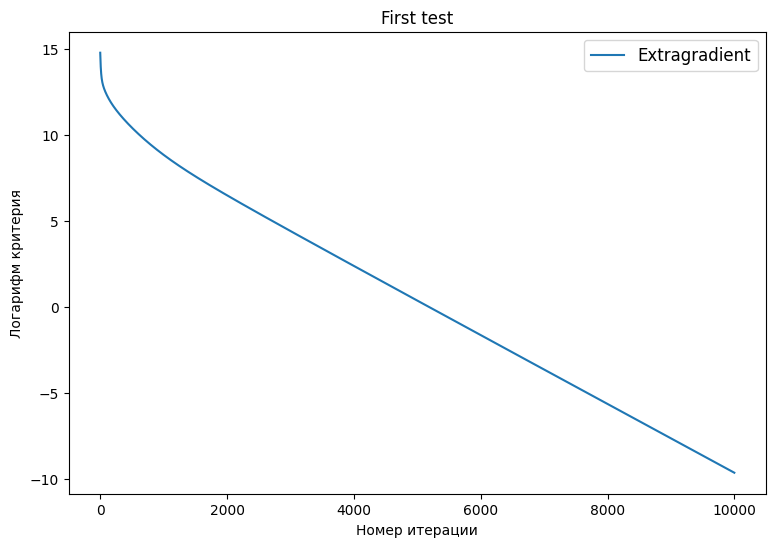

In [31]:
z_vals, times, errs = extragradient(z0, gamma=1/L, error=err_R, iters=10000)
risovach(errs=[errs], labels=['Extragradient'], title='First test')

In [1]:
def proj(x):
    '''
    for i in range(len(x)):
        if abs(x[i]) > 10:
            x[i] = 10 * np.sign(x[i])
    '''
    return x

## Задача 2

Теперь рассмотрим билинейную задачу на симплексе. Описание задачи возьмите из [лекций](https://www2.isye.gatech.edu/~nemirovs/BrazilTransparenciesJuly4.pdf) - Слайд 125 "How it Works: Policeman vs. Burglar" и следующий.

__(а)__ Сгенерируйте матрицу для данной задачи размера $n=10$ c $\theta = 1$.

In [1]:
#ответ

__(б)__ Для данной задачи предложите модификацию метода Экстраградиента, которая учитывает, что задача решается на симплексе. В этом может помочь [статья](https://arxiv.org/pdf/0809.0815.pdf) (смотри Секцию 3.3). Реализуйте данный метод.

In [2]:
#ответ

__(в)__ Решите билинейную задачу на симплексе с помощью нового метода и методов из Задачи 1. Как будете измерять сходимость? Возможно, в работах, из которых были взяты методы, найдется ответ. Постройте график сходимости. Визуализирйте полученный ответ, как это сделано в файле с лекциями. Сделайте вывод.  

In [ ]:
#ответ

__Бонусные пункты__

__(г)__ Реализуйте методы из Секции 3 [работы](https://arxiv.org/pdf/1908.08465.pdf). Решите с помощью них Задачу 1. Добавьте сходимость на график из пункта (б) Задачи 1.

In [ ]:
#ответ

__(д)__ Реализуйте Алгоритм 1 и Алгоритм 2 из [работы](https://arxiv.org/pdf/2102.08352.pdf). Решите с помощью них Задачу 2 (могут помочь Секции 5 и 6 из упомянутой работы). Добавьте сходимость на график из пункта (в) Задачи 2, предварительно поменяв ось $x$ (что теперь будете откладывать по оси $x$?).

In [ ]:
#ответ